
🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         100 non-null    object 
 1   Price         100 non-null    float64
 2   Availability  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB
None

🔹 First 5 Rows:
                                   Title  Price Availability
0                   A Light in the Attic  51.77     In stock
1                     Tipping the Velvet  53.74     In stock
2                             Soumission  50.10     In stock
3                          Sharp Objects  47.82     In stock
4  Sapiens: A Brief History of Humankind  54.23     In stock

🔹 Summary Statistics:
            Price
count  100.000000
mean    34.560700
std     14.638531
min     10.160000
25%     19.897500
50%     34.775000
75%     47.967500
max     58.110000

🔹 Unique Values in Availability:
Availa

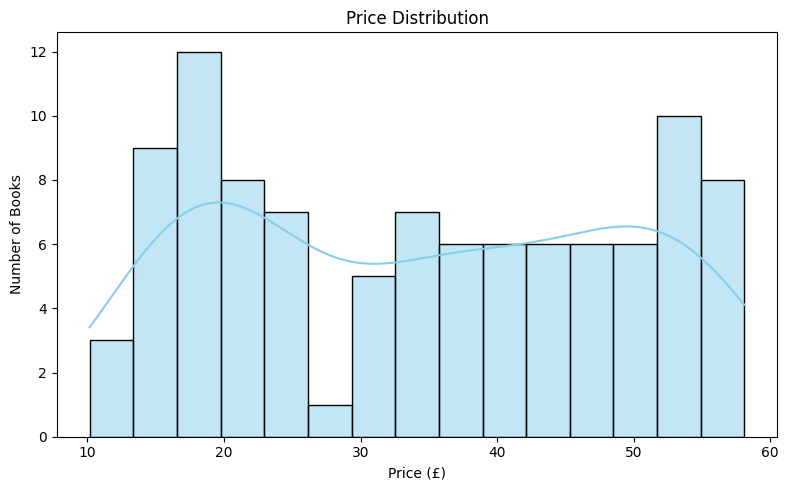

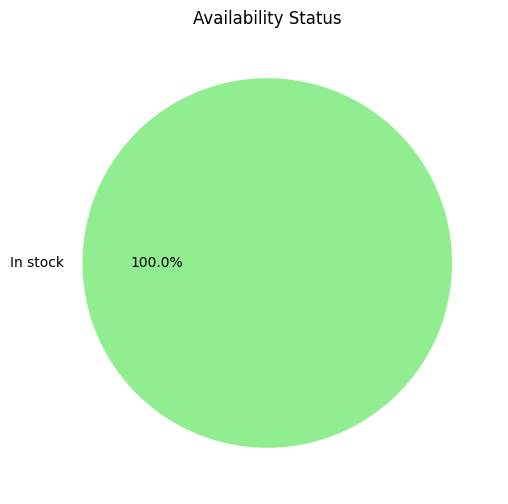

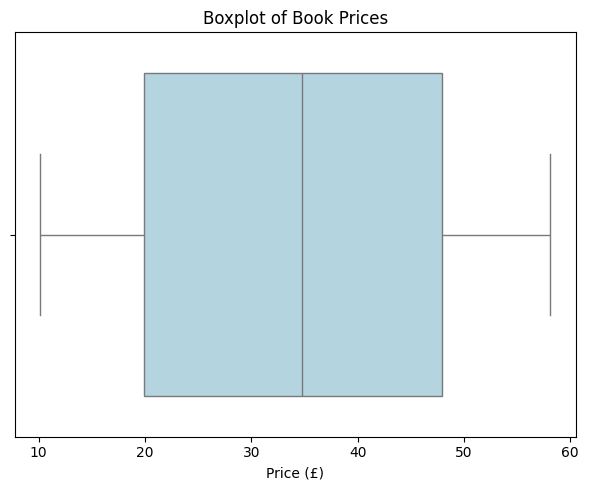

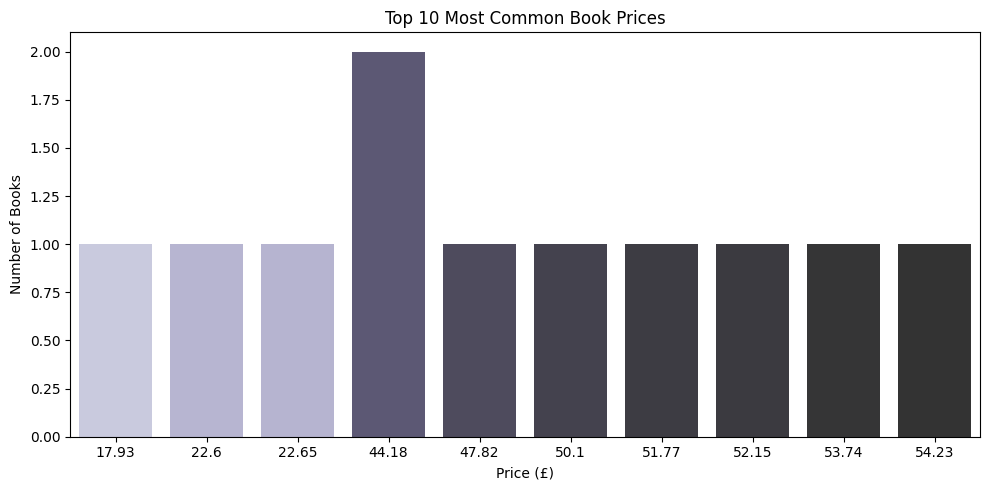

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv("books_data.csv", encoding='utf-8')

df["Price"] = df["Price"].apply(lambda x: float(re.sub(r"[^\d.]", "", str(x))))

# --- Step 1: Understand the Dataset Structure ---
print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 First 5 Rows:")
print(df.head())

print("\n🔹 Summary Statistics:")
print(df.describe())

print("\n🔹 Unique Values in Availability:")
print(df["Availability"].value_counts())

# --- Step 2: Check for Missing Values ---
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# --- Step 3: Ask and Explore Key Questions ---
# 1. What are the most common book prices?
top_prices = df["Price"].value_counts().head(10)
print("\n🔹 Top 10 Common Book Prices:")
print(top_prices)

# 2. How many books are in stock vs not in stock?
availability_counts = df["Availability"].value_counts()
print("\n🔹 Book Availability Distribution:")
print(availability_counts)

# 3. What's the average price of books?
average_price = df["Price"].mean()
print(f"\n🔹 Average Book Price: £{average_price:.2f}")
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=15, kde=True, color='skyblue')
plt.title("Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.savefig("eda_price_distribution.png")
plt.show()

# Plot 2: Availability Pie Chart
plt.figure(figsize=(6,6))
plt.pie(
    availability_counts,
    labels=availability_counts.index,
    autopct='%1.1f%%',
    colors=["lightgreen", "lightcoral"]
)
plt.title("Availability Status")
plt.savefig("eda_availability_pie.png")
plt.show()

# Plot 3: Boxplot to spot price outliers
plt.figure(figsize=(6,5))
sns.boxplot(x=df["Price"], color="lightblue")
plt.title("Boxplot of Book Prices")
plt.xlabel("Price (£)")
plt.tight_layout()
plt.savefig("eda_price_boxplot.png")
plt.show()

# Plot 4: Bar chart of top 10 most frequent prices
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=top_prices.index,
    y=top_prices.values,
    hue=top_prices.index,
    palette="Purples_d",
    dodge=False
)
ax.legend_.remove()
plt.title("Top 10 Most Common Book Prices")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.savefig("eda_top_prices_bar.png")
plt.show()
